# PRÁCTICA ML-101
## Parte 1. Problema de Clasificación
### Análisis Exploratorio

Cargamos las librerías y funciones necesarias

In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

Cargamos los datos del fichero

In [74]:
census = pd.read_csv("census.csv", sep = ',', decimal = '.')
census.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [75]:
census.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [246]:
census.isna().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [76]:
census.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

Codificamos variables categóricas

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

census['workclass'] = le.fit_transform(census['workclass'])
list(le.classes_)

[' Federal-gov',
 ' Local-gov',
 ' Private',
 ' Self-emp-inc',
 ' Self-emp-not-inc',
 ' State-gov',
 ' Without-pay']

In [78]:
census['education_level'] = le.fit_transform(census['education_level'])
list(le.classes_)

[' 10th',
 ' 11th',
 ' 12th',
 ' 1st-4th',
 ' 5th-6th',
 ' 7th-8th',
 ' 9th',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' Bachelors',
 ' Doctorate',
 ' HS-grad',
 ' Masters',
 ' Preschool',
 ' Prof-school',
 ' Some-college']

In [79]:
census['marital-status'] = le.fit_transform(census['marital-status'])
list(le.classes_)

[' Divorced',
 ' Married-AF-spouse',
 ' Married-civ-spouse',
 ' Married-spouse-absent',
 ' Never-married',
 ' Separated',
 ' Widowed']

In [80]:
census['occupation'] = le.fit_transform(census['occupation'])
list(le.classes_)

[' Adm-clerical',
 ' Armed-Forces',
 ' Craft-repair',
 ' Exec-managerial',
 ' Farming-fishing',
 ' Handlers-cleaners',
 ' Machine-op-inspct',
 ' Other-service',
 ' Priv-house-serv',
 ' Prof-specialty',
 ' Protective-serv',
 ' Sales',
 ' Tech-support',
 ' Transport-moving']

In [81]:
census['relationship'] = le.fit_transform(census['relationship'])
list(le.classes_)

[' Husband',
 ' Not-in-family',
 ' Other-relative',
 ' Own-child',
 ' Unmarried',
 ' Wife']

In [82]:
census['race'] = le.fit_transform(census['race'])
list(le.classes_)

[' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White']

In [83]:
census['sex'] = le.fit_transform(census['sex'])
list(le.classes_)

[' Female', ' Male']

In [84]:
census['native-country'] = le.fit_transform(census['native-country'])
list(le.classes_)

[' Cambodia',
 ' Canada',
 ' China',
 ' Columbia',
 ' Cuba',
 ' Dominican-Republic',
 ' Ecuador',
 ' El-Salvador',
 ' England',
 ' France',
 ' Germany',
 ' Greece',
 ' Guatemala',
 ' Haiti',
 ' Holand-Netherlands',
 ' Honduras',
 ' Hong',
 ' Hungary',
 ' India',
 ' Iran',
 ' Ireland',
 ' Italy',
 ' Jamaica',
 ' Japan',
 ' Laos',
 ' Mexico',
 ' Nicaragua',
 ' Outlying-US(Guam-USVI-etc)',
 ' Peru',
 ' Philippines',
 ' Poland',
 ' Portugal',
 ' Puerto-Rico',
 ' Scotland',
 ' South',
 ' Taiwan',
 ' Thailand',
 ' Trinadad&Tobago',
 ' United-States',
 ' Vietnam',
 ' Yugoslavia']

In [85]:
census['income'] = le.fit_transform(census['income'])
list(le.classes_)

['<=50K', '>50K']

In [86]:
census.dtypes

age                  int64
workclass            int32
education_level      int32
education-num      float64
marital-status       int32
occupation           int32
relationship         int32
race                 int32
sex                  int32
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country       int32
income               int32
dtype: object

In [87]:
census.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,38,0
1,50,4,9,13.0,2,3,0,4,1,0.0,0.0,13.0,38,0
2,38,2,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38,0
3,53,2,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38,0
4,28,2,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0


Dibujamos un histograma para cada característica

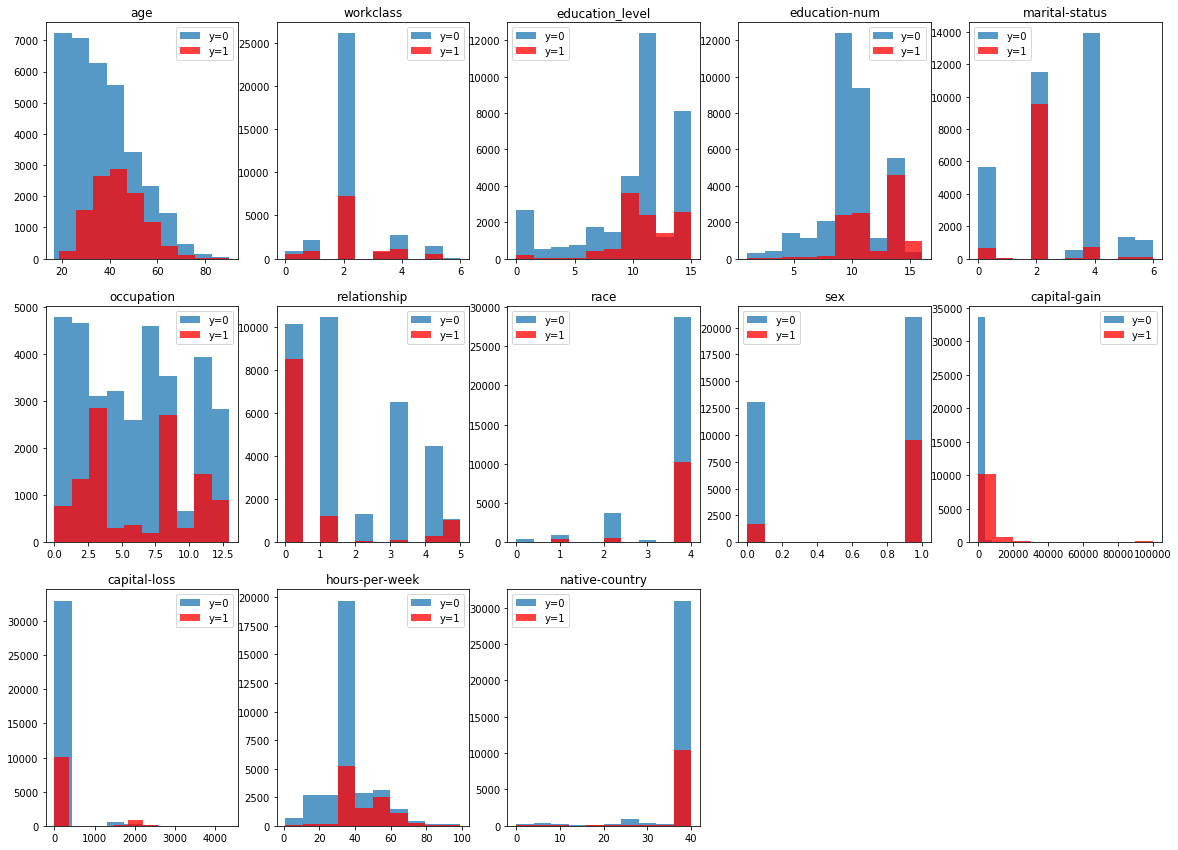

In [88]:
plt.figure(figsize=(20,20))

idx_0 =  census['income'] == 0
idx_1 =  census['income'] == 1

for i,feature in enumerate(census.columns.drop(['income'])):
    plt.subplot(4,5,i+1)   
    plt.hist(census.ix[idx_0,feature],normed=0, alpha=0.75,label='y=0')
    plt.hist(census.ix[idx_1,feature],normed=0, facecolor='red', alpha=0.75,label='y=1')
    plt.legend()
    plt.title(feature)

plt.show()

Correlación entre características

In [89]:
census.corr()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.085892,-0.003511,0.037623,-0.271623,-0.004474,-0.247564,0.023776,0.082053,0.079683,0.059351,0.101992,-0.003180,0.237040
workclass,0.085892,1.000000,0.017846,0.040779,-0.033221,0.017508,-0.065049,0.049765,0.069638,0.034543,0.008233,0.051366,0.003889,0.015659
education_level,-0.003511,0.017846,1.000000,0.347444,-0.041520,-0.033499,-0.013179,0.011457,-0.027569,0.029889,0.016877,0.060887,0.077893,0.081196
education-num,0.037623,0.040779,0.347444,1.000000,-0.064986,0.089686,-0.088431,0.031655,0.003417,0.126907,0.081711,0.146206,0.092994,0.332800
marital-status,-0.271623,-0.033221,-0.041520,-0.064986,1.000000,0.016399,0.180436,-0.070302,-0.120008,-0.042399,-0.034820,-0.183178,-0.022721,-0.192711
occupation,-0.004474,0.017508,-0.033499,0.089686,0.016399,1.000000,-0.051644,-0.000026,0.056625,0.019435,0.015267,0.016160,-0.002848,0.049787
relationship,-0.247564,-0.065049,-0.013179,-0.088431,0.180436,-0.051644,1.000000,-0.118584,-0.582974,-0.056818,-0.058425,-0.259194,-0.007144,-0.253402
race,0.023776,0.049765,0.011457,0.031655,-0.070302,-0.000026,-0.118584,1.000000,0.088935,0.014078,0.020955,0.044738,0.124342,0.070844
sex,0.082053,0.069638,-0.027569,0.003417,-0.120008,0.056625,-0.582974,0.088935,1.000000,0.047444,0.046457,0.231425,-0.004170,0.215760
capital-gain,0.079683,0.034543,0.029889,0.126907,-0.042399,0.019435,-0.056818,0.014078,0.047444,1.000000,-0.032102,0.083880,0.007643,0.221034


Mapa de correlación entre características

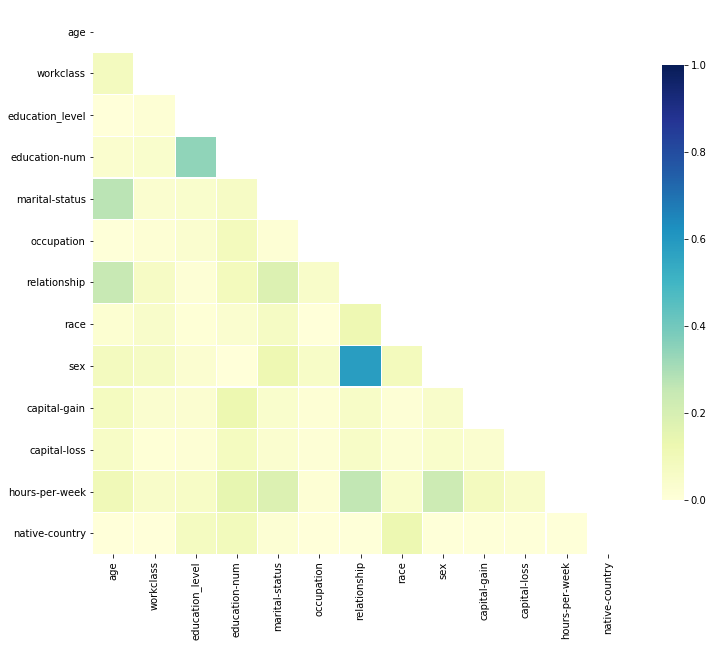

In [90]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(census.drop(['income'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

No considero que haya suficiente nivel de correlacion como para eliminar ninguna columna

### Regresión Logística
Lo primero que haremos, será crear un modelo de Regresión Logística sencillo

Preparamos los datos

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preparamos los datos
features = census.columns.drop('income')

X = census[features].as_matrix()
y = census['income'].as_matrix()

# Dividimos los datos (Entrenamiento y Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=0)

# Escalamos
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

# Datos del Modelo
print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)
print('Proporcion train:%0.3f'%np.mean(y_train))
print('Proporcion test: %0.3f'%np.mean(y_test))

Datos train:  (33916, 13)
Datos test:   (11306, 13)
Proporcion train:0.248
Proporcion test: 0.248


Realizamos la Regresión Logística

In [120]:
from sklearn.linear_model import LogisticRegression

# Creamos modelo
lr = LogisticRegression().fit(Xs_train,y_train)
# Ajustamos modelo
y_pred = lr.predict(Xs_train)

Vamos a definir un par de funciones que nos servirán para estudiar el resultado

In [121]:
# Definimos funcion para representar matriz de confusion
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [122]:
# Definimos funcion para calcular metricas
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()

Ahora, ajustamos el modelo y generamos la matriz de confusión y métricas correspondientes a los datos de Entrenamiento

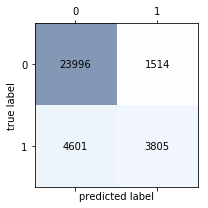

ACC:  0.819701615757
SEN:  0.452652867
ESP:  0.940650725206
PPV:  0.715360030081
FSC:  0.554462659381


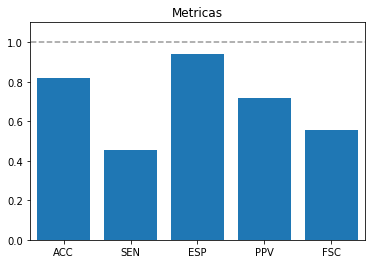

In [123]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión y metricas (Entrenamiento)
confmat = confusion_matrix(y_train,y_pred)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

Sacamos las mismas métricas, pero en este caso para los datos de Test

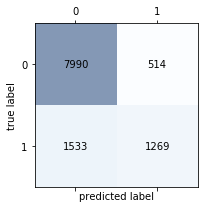

ACC:  0.818945692553
SEN:  0.452890792291
ESP:  0.939557855127
PPV:  0.711721817162
FSC:  0.553544165758


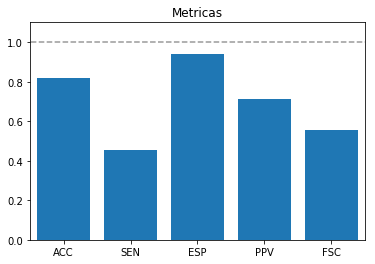

In [124]:
# Predecimos valores
y_pred_test = lr.predict(Xs_test)

# Matriz de Confusion y Metricas de los Datos de Test
confmat_test = confusion_matrix(y_test,y_pred_test)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

In [125]:
census['income'].value_counts()

0    34014
1    11208
Name: income, dtype: int64

Como vemos, las métricas son semejantes para Entrenamiento y Test, teniendo una aceptable tasa de acierto. 
Por otro lado, podemos observar que la especificidad sale bastante alta, y la sensibilidad baja, debido a que hay mucha diferencia entre una clase y otra, habiendo muchas más personas que ganan menos de 50k

Por último, dibujaremos la curva ROC

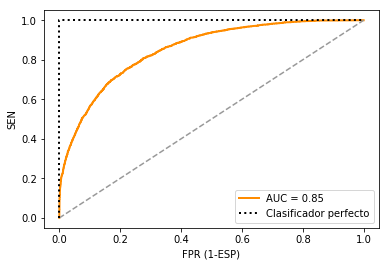

In [126]:
from sklearn.metrics import roc_curve, auc

y_prob = lr.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

El AUC de 0.85 nos indica que nuestro clasificador es bueno

De todos modos, trataremos de optimizar el modelo a través del parámetro libre coste C, que nos permite controlar la complejidad del algoritmo, penalizando los errrores en clasificación

Probamos varios scores, y nos quedamos con el más alto

best mean cross-validation score: 0.555
best parameters: {'C': 0.063095734448019303}


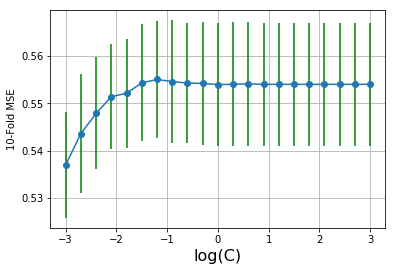

In [127]:
from sklearn.model_selection import GridSearchCV

vectorC = np.logspace(-3,3,21)
param_grid = {'C': vectorC }

grid = GridSearchCV(LogisticRegression(random_state=0),
                    scoring='f1', 
                    param_grid=param_grid, 
                    cv = 10)

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(vectorC),scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(C)',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.grid()
plt.show()

best mean cross-validation score: 0.805
best parameters: {'C': 0.063095734448019303}


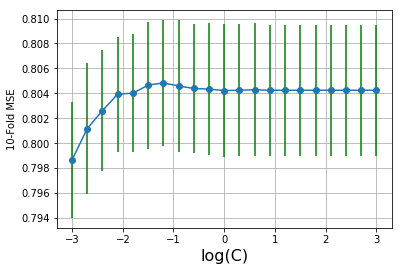

In [128]:
from sklearn.model_selection import GridSearchCV

vectorC = np.logspace(-3,3,21)
param_grid = {'C': vectorC }

grid = GridSearchCV(LogisticRegression(random_state=0),
                    scoring='f1_weighted', 
                    param_grid=param_grid, 
                    cv = 10)

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(vectorC),scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(C)',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.grid()
plt.show()

best mean cross-validation score: 0.820
best parameters: {'C': 0.063095734448019303}


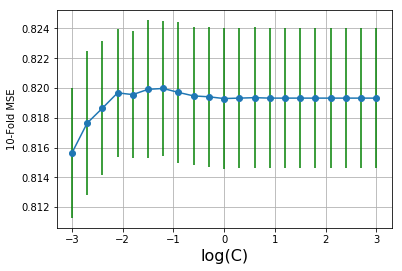

In [141]:
from sklearn.model_selection import GridSearchCV

vectorC = np.logspace(-3,3,21)
param_grid = {'C': vectorC }

grid = GridSearchCV(LogisticRegression(random_state=0),
                    scoring='accuracy', 
                    param_grid=param_grid, 
                    cv = 10)

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(vectorC),scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(C)',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.grid()
plt.show()

Parece que el score de accuracy es el más adecuado para nuestro caso

Repetimos la Regresión Logística, pero con el valor del parámetro C optimizado

In [142]:
Copt = grid.best_params_['C']

lr = LogisticRegression(random_state=0, C = Copt).fit(Xs_train,y_train)

print("Train: ", lr.score(Xs_train, y_train))
print("Test: ", lr.score(Xs_test, y_test))

Train:  0.820173369501
Test:  0.81876879533


Comprobamos sus métricas

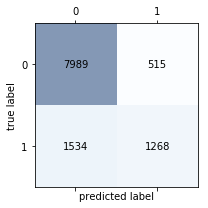

ACC:  0.81876879533
SEN:  0.452533904354
ESP:  0.939440263405
PPV:  0.711160964666
FSC:  0.553107960742


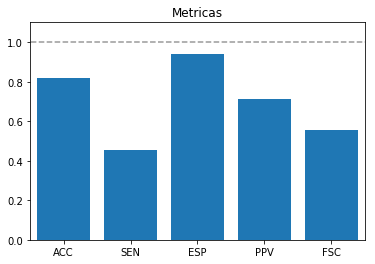

In [143]:
y_pred = lr.predict(Xs_test)

confmat_test  = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

Y curva ROC

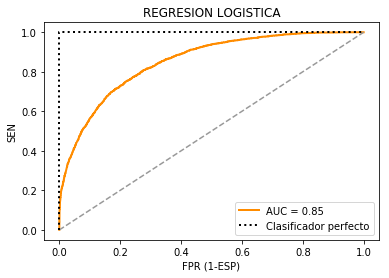

In [144]:
from sklearn.metrics import roc_curve, auc

y_prob = lr.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.title('REGRESION LOGISTICA')
plt.legend(loc="lower right")
plt.show()

No se observa que hayamos mejorado mucho, la verdad.
Como hemos comentado anteriormente, las clases estaban un poco desbalanceadas.
Vemos qué pasa balanceando los pesos en la Regresión

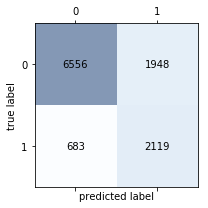

ACC:  0.76729170352
SEN:  0.756245538901
ESP:  0.770931326435
PPV:  0.521022866978
FSC:  0.616974814383


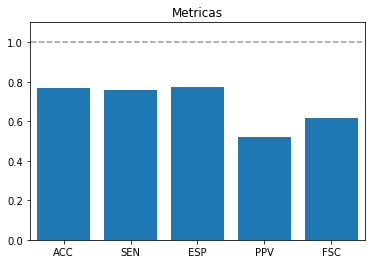

In [134]:
lr = LogisticRegression(random_state=0, C = Copt, class_weight='balanced').fit(Xs_train,y_train)
y_pred = lr.predict(Xs_test)

confmat_test  = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

Como era de esperar, al balancear los pesos, ahora las métricas se ajustan más

### Arbol de Decision

Probaremos ahora a clasificar mediante un Árbol de Decisión. Vamos a tratar de optimizar su profundidad (complejidad)

best mean cross-validation score: 0.850
best parameters: {'max_depth': 7}


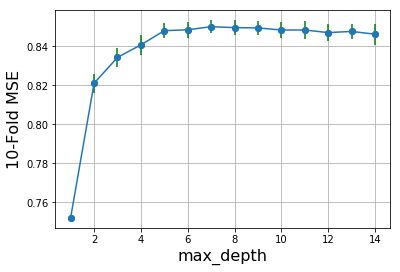

In [156]:
from sklearn.tree import DecisionTreeClassifier

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    scoring='accuracy', 
                    param_grid=param_grid, 
                    cv = 10)

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.plot(maxDepth,scores,'-o')
plt.errorbar(maxDepth,scores,yerr=std_scores, fmt='o',ecolor='g')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE',fontsize=16)
plt.grid()
plt.show()

Y comprobamos sus métricas

In [157]:
depthOpt = grid.best_params_['max_depth']

tree = DecisionTreeClassifier(random_state=0, max_depth= depthOpt).fit(Xs_train,y_train)

print("Train: ", tree.score(Xs_train, y_train))
print("Test: ", tree.score(Xs_test, y_test))

Train:  0.854611392853
Test:  0.849372014859


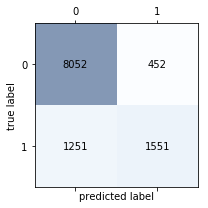

ACC:  0.849372014859
SEN:  0.553533190578
ESP:  0.946848541863
PPV:  0.774338492262
FSC:  0.645577523413


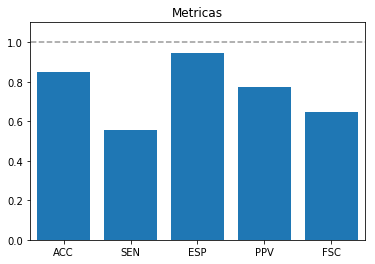

In [158]:
# Comprobamos Metricas

y_pred = tree.predict(Xs_test)

confmat_test  = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

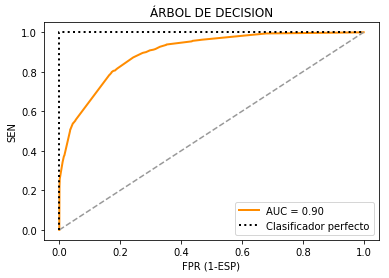

In [159]:
# Curva ROC

y_prob = tree.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.title('ÁRBOL DE DECISION')
plt.legend(loc="lower right")
plt.show()

Hemos mejorado bastante las métricas, incluida la curva ROC

Pero observando la gráfica, creo que se podría ajustar el max_depth a 5. Probemos.

In [163]:
tree = DecisionTreeClassifier(random_state=0, max_depth= 5).fit(Xs_train,y_train)

print("Train: ", tree.score(Xs_train, y_train))
print("Test: ", tree.score(Xs_test, y_test))

Train:  0.848802924873
Test:  0.847868388466


Parece que ha ido bien, y que el score de Train y Test se asemejan más, lo cual indicaría menos riesgo de overfitting

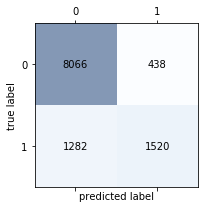

ACC:  0.847868388466
SEN:  0.542469664525
ESP:  0.948494825964
PPV:  0.776302349336
FSC:  0.638655462185


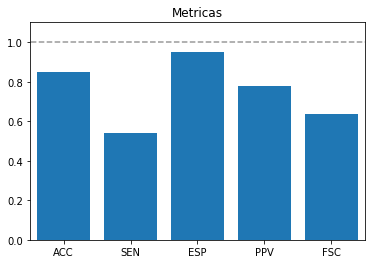

In [164]:
# Comprobamos Metricas

y_pred = tree.predict(Xs_test)

confmat_test  = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

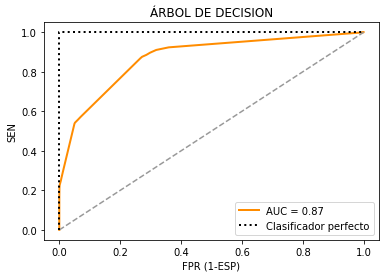

In [165]:
# Curva ROC

y_prob = tree.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.title('ÁRBOL DE DECISION')
plt.legend(loc="lower right")
plt.show()

Hemos empeorado ligeramente en las métricas. Sobre todo la curva ROC nos ha salido peor. Así que, dejaremos el valor obtenido en la validación cruzada.

In [166]:
# Dejamos el Arbol de Decision optimizado (segun CV)
tree = DecisionTreeClassifier(random_state=0, max_depth= depthOpt).fit(Xs_train,y_train)
y_pred = tree.predict(Xs_test)

# Random Forest

Intentamos mejorar las prestaciones para un Random Forest, optimizando su máxima profundidad.

best mean cross-validation score: 0.861
best parameters: {'max_depth': 16}


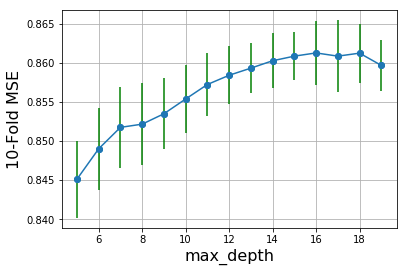

In [231]:
maxDepth   = range(5,20)
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators = 200, max_features='sqrt'),
                    scoring='accuracy', 
                    param_grid=param_grid, 
                    cv = 10)

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.plot(maxDepth,scores,'-o')
plt.errorbar(maxDepth,scores,yerr=std_scores, fmt='o',ecolor='g')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE',fontsize=16)
plt.grid()
plt.show()

Comprobamos sus métricas

In [232]:
depthOpt = grid.best_params_['max_depth']

rf = RandomForestClassifier(random_state=0,
                            max_depth=depthOpt,
                            n_estimators = 200,
                            max_features='sqrt').fit(Xs_train,y_train)

print("Train: ", rf.score(Xs_train, y_train))
print("Test: ", rf.score(Xs_test, y_test))

Train:  0.903408420804
Test:  0.862904652397


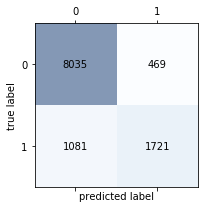

ACC:  0.862904652397
SEN:  0.6142041399
ESP:  0.944849482596
PPV:  0.785844748858
FSC:  0.689503205128


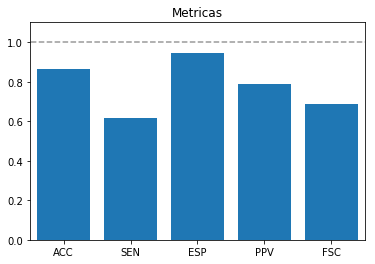

In [233]:
# Matriz de Confusion

y_pred_test = rf.predict(Xs_test)

confmat_test  = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

Y representamos la curva ROC

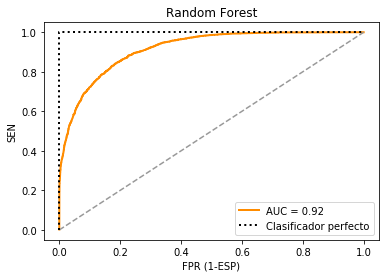

In [234]:
# Curva ROC

y_prob = rf.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.title('Random Forest')
plt.legend(loc="lower right")
plt.show()

Hemos conseguido mejores resultados que en el Árbol de Decisión. Aunque, eso si, el coste computacional de este algoritmo ya empieza a ser importante

Además, Max_Depth = 16 es una barbaridad, y los score de Train y Test están alejados. Intentemos ajustar un poco para evitar overfitting.

In [235]:
rf = RandomForestClassifier(random_state=0,
                            max_depth=depthOpt,
                            n_estimators = 200,
                            max_features='sqrt').fit(Xs_train,y_train)

print("Train: ", rf.score(Xs_train, y_train))
print("Test: ", rf.score(Xs_test, y_test))

Train:  0.903408420804
Test:  0.862904652397


Probamos con max_depth = 10

In [237]:
rf = RandomForestClassifier(random_state=0,
                            max_depth=10,
                            n_estimators = 200,
                            max_features='sqrt').fit(Xs_train,y_train)

print("Train: ", rf.score(Xs_train, y_train))
print("Test: ", rf.score(Xs_test, y_test))

Train:  0.863751621653
Test:  0.854855828763


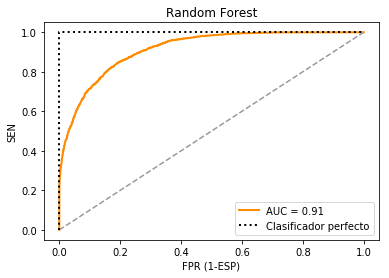

In [238]:
# Curva ROC

y_prob = rf.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.title('Random Forest')
plt.legend(loc="lower right")
plt.show()

Hemos perdido algo de AUC, pero no mucho.

Intentemos ajustar un poco más, con max_depth = 9

In [239]:
rf = RandomForestClassifier(random_state=0,
                            max_depth=9,
                            n_estimators = 200,
                            max_features='sqrt').fit(Xs_train,y_train)

print("Train: ", rf.score(Xs_train, y_train))
print("Test: ", rf.score(Xs_test, y_test))

Train:  0.858267484373
Test:  0.852202370423


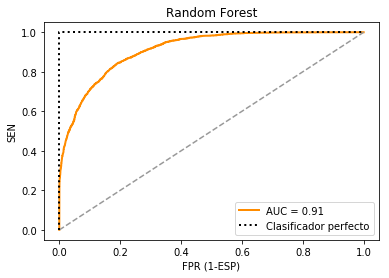

In [240]:
# Curva ROC

y_prob = rf.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.title('Random Forest')
plt.legend(loc="lower right")
plt.show()

Seguimos sin perder AUC. Probemos con max_depth = 7

In [241]:
rf = RandomForestClassifier(random_state=0,
                            max_depth=7,
                            n_estimators = 200,
                            max_features='sqrt').fit(Xs_train,y_train)

print("Train: ", rf.score(Xs_train, y_train))
print("Test: ", rf.score(Xs_test, y_test))

Train:  0.853373039273
Test:  0.851760127366


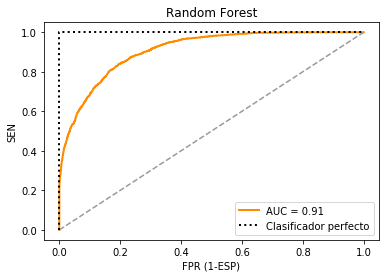

In [242]:
# Curva ROC

y_prob = rf.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.title('Random Forest')
plt.legend(loc="lower right")
plt.show()

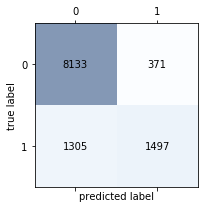

ACC:  0.851760127366
SEN:  0.53426124197
ESP:  0.956373471308
PPV:  0.801391862955
FSC:  0.641113490364


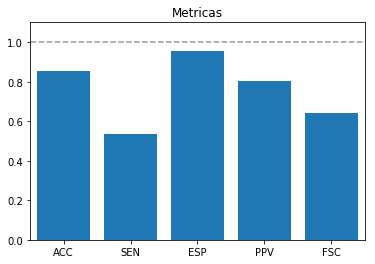

In [243]:
# Matriz de Confusion

y_pred_test = rf.predict(Xs_test)

confmat_test  = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

Pienso que ya hemos ajustado bastante los score de Test y Entrenamiento (con max_depth = 6, nos bajaría AUC a 0.90). Hemos sacrificado algún punto en las prestaciones, pero controlaremos mejor el overfitting

### Boosted Trees

Para la búsqueda de parámetros libres optimizados, fijamos la complejidad (max_depth = 2), y barremos sobre los otros dos parámetros (número de iteraciones y tasa de aprendizaje)

In [226]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [25,50,75,100,125,150,175,200,300,350,400,450,500]
learningRate = [0.5,0.1,0.05,0.01]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=2), param_grid=param_grid, cv = 5)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.870
best parameters: {'learning_rate': 0.5, 'n_estimators': 300}


Comprobamos las diferentes curvas obtenidas, según las distintas tasas de aprendizaje aplicadas.

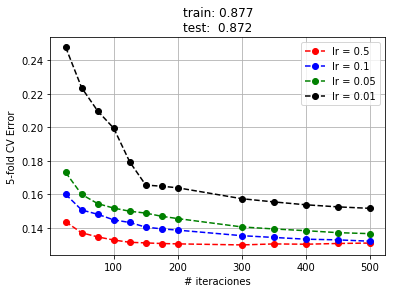

In [227]:
# calculamos métricas globales
bt = GradientBoostingClassifier(random_state=0, max_depth=2,learning_rate= 0.5, n_estimators= 300)
bt.fit(Xs_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(Xs_train,y_train),bt.score(Xs_test,y_test)))
plt.grid()
plt.show()

Efectivamente, la curva cuyo comportamiento parece más estable, es la que corresponde a la tasa 0.5

Comprobaremos sus métricas

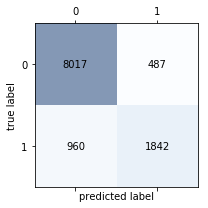

ACC:  0.872014859367
SEN:  0.6573875803
ESP:  0.942732831609
PPV:  0.79089738085
FSC:  0.717988696161


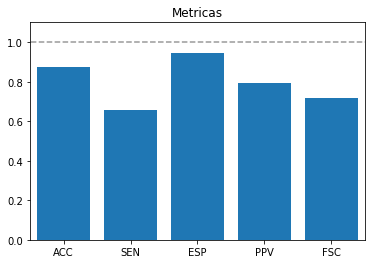

In [230]:
# Matriz de Confusion

y_pred_test = bt.predict(Xs_test)

confmat_test  = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

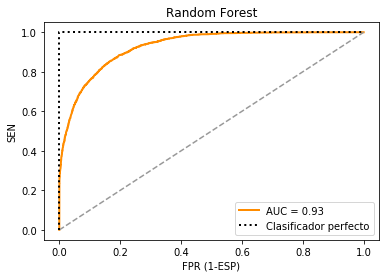

In [228]:
# Curva ROC

y_prob = bt.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.title('Random Forest')
plt.legend(loc="lower right")
plt.show()

Como vemos, hemos vuelto a mejorar las prestaciones de nuestro clasificador, siendo menos complejo que boosted tree

### SVC

Desaconsejado por el coste computacional que conllevaría (lo he intentado ejecutar, pero no me ha dado tiempo a que terminara antes de fecha de entrega, lo siento)

In [ ]:
from sklearn.svm import SVC

vectorC = np.logspace(-1, 3, 16)
vectorG = np.logspace(-9, -1, 24)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVC(kernel='rbf'), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(Xs_train, y_train)

In [ ]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.8)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [ ]:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVC(kernel='rbf',gamma = Gopt, C = Copt, probability=True).fit(X_train,y_train)
print('Acc (TEST): %0.2f'%svmModel.score(X_test,y_test))

En conclusión, y a falta de probar el rendimiento del RBF, el que mejores prestaciones nos ha dado ha sido boosted tree